In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

dataset = pd.read_csv('Dataset_refined/dataset_course2.csv', sep=',')
dataset = dataset.drop(['velocity'], axis=1)
X = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values

In [2]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [3]:
#classify data
def classifyData(data):
    classified_data = []
    limits = []
    parts = 0.4189*2/5
    start = -0.4189
    for i in range(1,5):
        limits.append(start + parts*i)
    
    print(limits)
    for sample in data:
        if sample < limits[0]:
            classified_data.append('Hard_left')
        elif sample >= limits[0] and sample < limits[1] :
            classified_data.append('Slight_left')
        elif sample >= limits[1] and sample < limits[2]:
            classified_data.append('Straight')
        elif sample >= limits[2] and sample < limits[3]:
            classified_data.append('Slight_right')
        elif sample >= limits[3]:
            classified_data.append('Hard_right')
              
    
    return classified_data

[-0.25134, -0.08378000000000002, 0.08378000000000002, 0.25133999999999995]
[-0.25134, -0.08378000000000002, 0.08378000000000002, 0.25133999999999995]


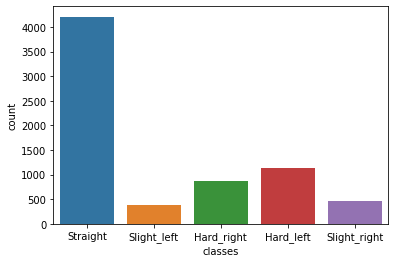

In [4]:
y_train = classifyData(y_train)
y_test = classifyData(y_test)
df = pd.DataFrame(y_train, columns=['classes'])
sns.countplot(x = 'classes',data=df)

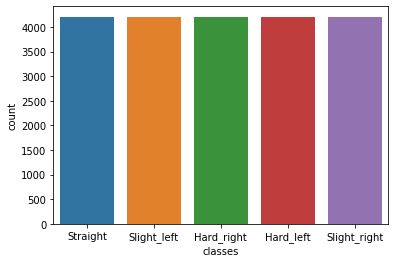

In [5]:
#Oversampling
smote = SMOTE(sampling_strategy ='not majority', k_neighbors = 10,random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)
df_res = pd.DataFrame(y_train_res, columns=['classes'])
sns.countplot(x = 'classes',data=df_res)

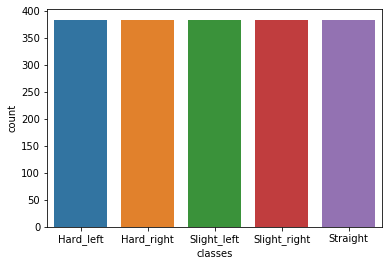

In [6]:
#Undersampling
nm = NearMiss(version=1)
x_train_res, y_train_res = nm.fit_resample(x_train, y_train)
df_res = pd.DataFrame(y_train_res, columns=['classes'])
sns.countplot(x = 'classes',data=df_res)

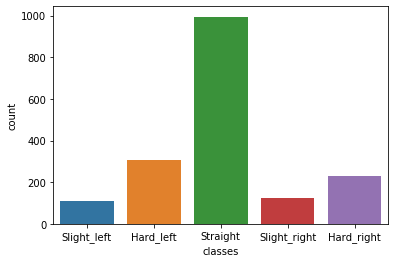

In [6]:
df2 = pd.DataFrame(y_test, columns=['classes'])
sns.countplot(x = 'classes',data=df2)

In [7]:
mlp = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(15,30,30,15),learning_rate_init=0.0005, verbose=True, early_stopping=True,  random_state=42)
mlp.fit(x_train_res, y_train_res)

Iteration 1, loss = 1.75386142
Validation score: 0.396388
Iteration 2, loss = 1.29827654
Validation score: 0.461977
Iteration 3, loss = 1.18249038
Validation score: 0.486217
Iteration 4, loss = 1.09727364
Validation score: 0.516635
Iteration 5, loss = 1.02276360
Validation score: 0.557034
Iteration 6, loss = 0.95320622
Validation score: 0.566540
Iteration 7, loss = 0.89461816
Validation score: 0.599810
Iteration 8, loss = 0.85104411
Validation score: 0.632605
Iteration 9, loss = 0.80874282
Validation score: 0.643061
Iteration 10, loss = 0.77640188
Validation score: 0.657795
Iteration 11, loss = 0.74180210
Validation score: 0.669677
Iteration 12, loss = 0.70855424
Validation score: 0.671578
Iteration 13, loss = 0.68506911
Validation score: 0.692015
Iteration 14, loss = 0.66178334
Validation score: 0.700095
Iteration 15, loss = 0.63279284
Validation score: 0.707224
Iteration 16, loss = 0.61311020
Validation score: 0.710076
Iteration 17, loss = 0.59725854
Validation score: 0.712452
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(15, 30, 30, 15), learning_rate='constant',
              learning_rate_init=0.0005, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [8]:
y_pred = mlp.predict(x_test)

In [9]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

   Hard_left       0.46      0.52      0.49       309
  Hard_right       0.49      0.62      0.55       228
 Slight_left       0.22      0.28      0.25       112
Slight_right       0.32      0.35      0.33       123
    Straight       0.70      0.60      0.65       994

    accuracy                           0.55      1766
   macro avg       0.44      0.47      0.45      1766
weighted avg       0.58      0.55      0.56      1766

